<a href="https://colab.research.google.com/github/100477706/Proyecto2_Aprendizaje/blob/main/Clustering_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. IDENTIFICACIÓN DE ESTUDIANTES**

---

**Grupo de Trabajo:** 27

Gabriel José Rivera Amor - 100477706@alumnos.uc3m.es

Santiago José Díaz Rodríguez - 100479095@alumnos.uc3m.es

**Enlace Github:** https://github.com/100477706/Proyecto2_Aprendizaje.git

# **1. CARGA DE DATOS**

---

Mediante este apartado realizamos la carga de datos al Google Collab teniendo en cuenta que en cada ingreso a la aplicación se debe realizar la carga del dataset.

En este apartado se descomprime el archivo que se ha subido y se muestran los datos por pantalla.

In [ ]:
!ls

sample_data  semillas.csv


In [ ]:
!pip install scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
df = pd.read_csv("semillas.csv", sep=",") #subir el archivo de semillas
df.head()

,area,perimetro,compacidad,longitud,anchura,asimetria,surco,clase
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Como estamos haciendo un proceso de clustering, es necesario "eliminar" de los datos cargados dicha columna, ya que nosotros estamos buscando etiquetar a la clase a la que pertencen cada uno de los elementos.

In [ ]:
# Columna a eliminar para el clustering
delete_cols = ['clase']

# Retiramos la columna con la función drop
df_c = df.drop(columns=delete_cols)

# Definimos la data a utilizar
X = df_c
y = df['clase']

# Mostramos nuevamenete el dataset para verificar que se ha eliminado la columna
df_c.head()

,area,perimetro,compacidad,longitud,anchura,asimetria,surco
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


# **2. PRINCIPAL COMPONENT ANALYSIS (PCA)**

---

El clustering es una técnica de aprendizaje no supervisado, la cual consiste en organizar un conjunto de datos en grupos, de tal forma que todos los elementos del grupo sean similares entre sí y los datos de grupos diferentes sean lo más distinto posible.

Por ello, primeramente es necesario elegir un escaldor para realizar el proceso de normalización de los datos presentes en el dataset. Sin embargo, los datos pueden tener muchas dimensiones, por lo que hacemos uso de PCA para poder reducir la dimensionalidad a dos dimensiones y poder graficarlos.

Para que podamos reducir efectivamente la dimensionalidad, queremos que pocas componentes, se pueda observar la mayor proporción de varianza posible, ya que representa la mayor cantidad de información o dispersión que tienen los datos.

Para ello, procedemos a visualizar con cada uno de los escaladores, la varianza obtenida y la acumulada mientras aumentamos el número de componentes. Es importante decir que solo gestionaremos PCA con dos componentes como se ha indicado en el enunciado.

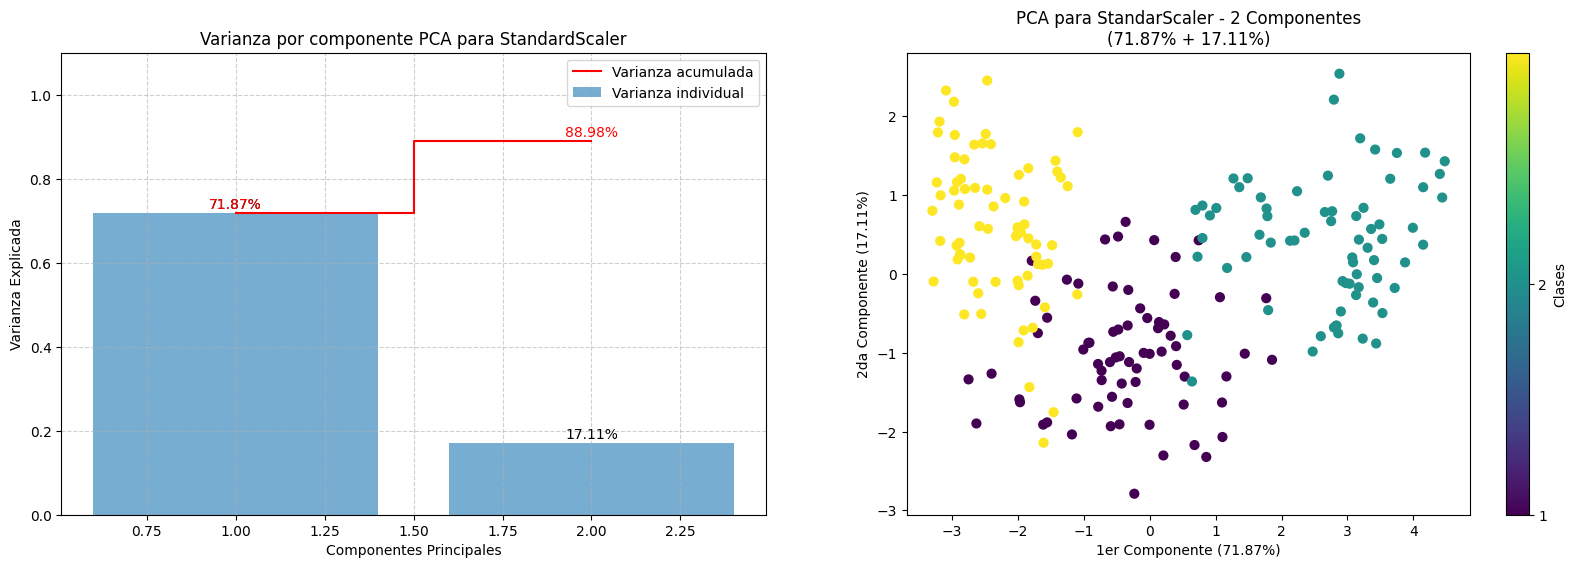

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Siempre escalar antes de PCA
    ('pca', PCA(n_components=2))
])

# Ajustar y transformar
X_reduced = pipeline.fit_transform(X)
pca = pipeline.named_steps['pca']

# Varianza explicada y acumulada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Ajustar el espacio entre subplots (wspace: espacio horizontal)
plt.subplots_adjust(wspace=0.2)  # Aumentá el valor para más separación

# Plot de Varianza Explicada
axes[0].bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Varianza individual')
axes[0].step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', color='red', label='Varianza acumulada')

for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance)):
    axes[0].text(i + 1, ev + 0.01, f"{ev:.2%}", ha='center')
    axes[0].text(i + 1, cv + 0.01, f"{cv:.2%}", ha='center', color='red')

axes[0].set_xlabel('Componentes Principales')
axes[0].set_ylabel('Varianza Explicada')
axes[0].set_title('Varianza por componente PCA para StandardScaler')
axes[0].legend(loc='best')
axes[0].set_ylim(0, 1.1)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot de PCA (scatter)
scatter = axes[1].scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=40, cmap='viridis')
axes[1].set_title(f'PCA para StandarScaler - 2 Componentes\n({explained_variance[0]:.2%} + {explained_variance[1]:.2%})')
axes[1].set_xlabel(f'1er Componente ({explained_variance[0]:.2%})')
axes[1].set_ylabel(f'2da Componente ({explained_variance[1]:.2%})')

# Barra de color
fig.colorbar(scatter, ax=axes[1], ticks=range(3), label='Clases')
plt.show()


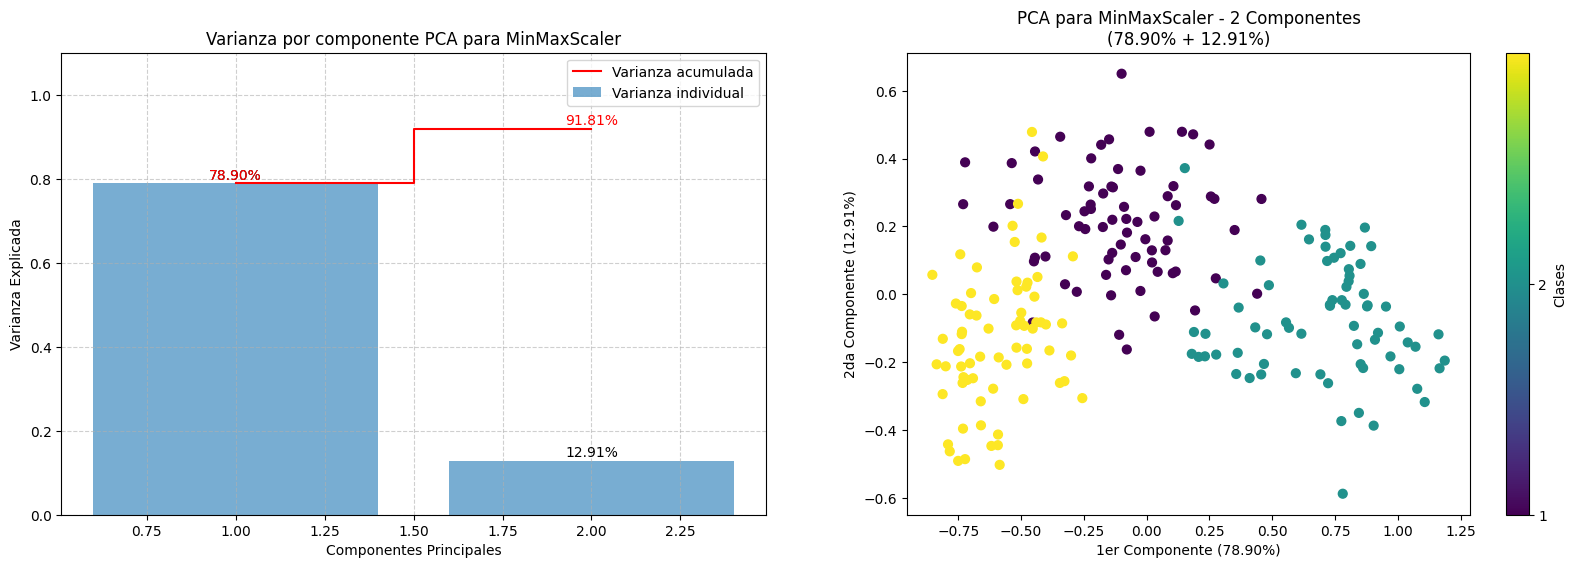

In [ ]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Siempre escalar antes de PCA
    ('pca', PCA(n_components=2))
])

# Ajustar y transformar
X_reduced = pipeline.fit_transform(X)
pca = pipeline.named_steps['pca']

# Varianza explicada y acumulada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Ajustar el espacio entre subplots (wspace: espacio horizontal)
plt.subplots_adjust(wspace=0.2)  # Aumentá el valor para más separación

# Plot de Varianza Explicada
axes[0].bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Varianza individual')
axes[0].step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', color='red', label='Varianza acumulada')

for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance)):
    axes[0].text(i + 1, ev + 0.01, f"{ev:.2%}", ha='center')
    axes[0].text(i + 1, cv + 0.01, f"{cv:.2%}", ha='center', color='red')

axes[0].set_xlabel('Componentes Principales')
axes[0].set_ylabel('Varianza Explicada')
axes[0].set_title('Varianza por componente PCA para MinMaxScaler')
axes[0].legend(loc='best')
axes[0].set_ylim(0, 1.1)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot de PCA (scatter)
scatter = axes[1].scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=40, cmap='viridis')
axes[1].set_title(f'PCA para MinMaxScaler - 2 Componentes\n({explained_variance[0]:.2%} + {explained_variance[1]:.2%})')
axes[1].set_xlabel(f'1er Componente ({explained_variance[0]:.2%})')
axes[1].set_ylabel(f'2da Componente ({explained_variance[1]:.2%})')

# Barra de color
fig.colorbar(scatter, ax=axes[1], ticks=range(3), label='Clases')
plt.show()


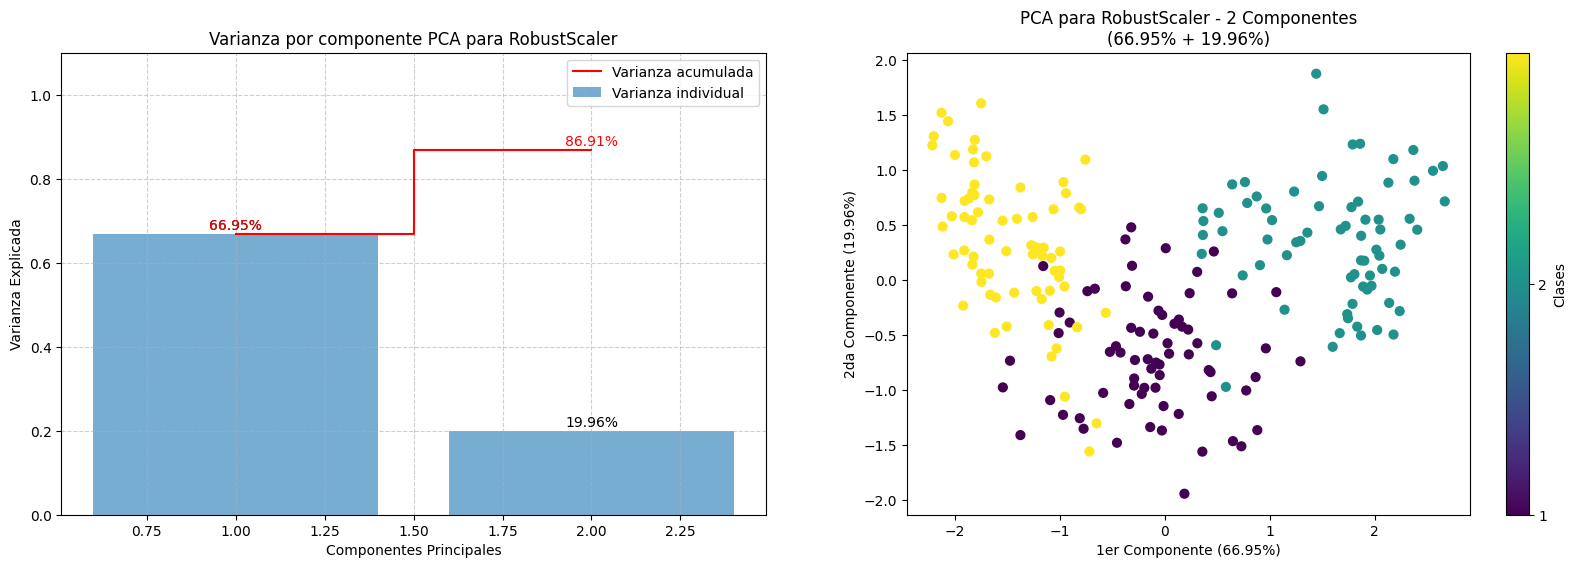

In [ ]:
pipeline = Pipeline([
    ('scaler', RobustScaler()),  # Siempre escalar antes de PCA
    ('pca', PCA(n_components=2))
])

# Ajustar y transformar
X_reduced = pipeline.fit_transform(X)
pca = pipeline.named_steps['pca']

# Varianza explicada y acumulada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Ajustar el espacio entre subplots (wspace: espacio horizontal)
plt.subplots_adjust(wspace=0.2)  # Aumentá el valor para más separación

# Plot de Varianza Explicada
axes[0].bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Varianza individual')
axes[0].step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', color='red', label='Varianza acumulada')

for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance)):
    axes[0].text(i + 1, ev + 0.01, f"{ev:.2%}", ha='center')
    axes[0].text(i + 1, cv + 0.01, f"{cv:.2%}", ha='center', color='red')

axes[0].set_xlabel('Componentes Principales')
axes[0].set_ylabel('Varianza Explicada')
axes[0].set_title('Varianza por componente PCA para RobustScaler')
axes[0].legend(loc='best')
axes[0].set_ylim(0, 1.1)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot de PCA (scatter)
scatter = axes[1].scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=40, cmap='viridis')
axes[1].set_title(f'PCA para RobustScaler - 2 Componentes\n({explained_variance[0]:.2%} + {explained_variance[1]:.2%})')
axes[1].set_xlabel(f'1er Componente ({explained_variance[0]:.2%})')
axes[1].set_ylabel(f'2da Componente ({explained_variance[1]:.2%})')

# Barra de color
fig.colorbar(scatter, ax=axes[1], ticks=range(3), label='Clases')
plt.show()

Después de visualizar los resultados obtenidos mediante el uso de PCA, se puede verificar los diferentes valores de varianza y varianza acumulada según el número de componentes que se consideren. Para el caso de nuestro ejercicio, se considera que el número de componenetes a considerar es de 2, lo cual permite visiauizar los resutados en dos dimensiones.

Analizando los resultados anteriores podemos afirmar que aquel escalador con mejor varianza acumulada y el cual utilizaremos para aplicar las técnicas de Clustering es el MinMaxScaler con un 91.81%

# **3. TÉCNICAS DE CLUSTERING**

---

Una vez se ha obtenido el mejor método de escalado para nuestro cluster, ahora es necesario establecer la mejor de las técnicas de clustering para determinar agrupaciones significativas en los datos y los cuales permitan establecer a qué clase pertence cada uno.

Para ello, analizaremos y discutiremos los métodos K-Means, DBSCAN y el Clustering Jerarquico con diferentes valores para sus parámetros más importantes, buscando aquel con el que se obtenga un mejor resultado. Por ello, iniciaremos con el algoritmo de K-Means.

## **3.1. K-Means**

---

En este apartado analizaremos y discuteremos los aspectos más importantes del algoritmo de clustering de K-Means y verificaremos que cuál de los resultados es el mejor dados unos parámetros, de tal manera de poder compararlos con los resultados del resto de algoritmos.

### **3.1.1. Modificación de Hiperparámetros**

---

Antes de comenzar con el proceso de comparación de resultados, es necesario conocer los hiperparámetros que tiene el algoritmo, de tal forma de buscar una modificación idónea que permita desvelar un resultado.

- `n_clusters`: determina el número *𝐾* de clusters que se van a generar.
- `init`: estrategia para asignar los centroides iniciales. Por defecto se emplea 'k-means++', una estrategia que trata de alejar los centroides lo máximo posible facilitando la convergencia. Sin embargo, esta estrategia puede ralentizar el proceso cuando hay muchos datos, si esto ocurre, es mejor utilizar 'random'.
- `n_init`: determina el número de veces que se va a repetir el proceso, cada vez con una asignación aleatoria inicial distinta. Es recomendable que este último valor sea alto, entre 10-25, para no obtener resultados subóptimos debido a una iniciación poco afortunada del proceso.
- `max_iter`: número máximo de iteraciones permitidas.
- `random_state`: semilla para garantizar la reproducibilidad de los resultados.

Sabiendo esta información y tal como se nos indicado, procederemos a modificar el hiperparámetro correspondiente al número de clusters `n_clusters` a través de los procesos del Método del Codo y el Método de la Silueta, para posteriormente discutir los resultados obtenidos y definir un valor para este hiperparámetro.

####  **3.1.1.a. Método del Codo (Elbow Method)**

---

Para determinar cuál es el número de clusters que se van a generar para permitir conocer cual valor es el mejor valor para el cluster. La idea es obtener para valor de K la suma de los cuadrados de la distancia de cada punto con el centroide al que se encuentra asignado (se obtiene de `.inertia_`), siendo esta una medida de lo coherentes que son internamente los clusters.

La idea es que si K crece, el valor de `.inertia_` es menor porque cada cluster es más pequeño. Sin embargo, a partir de cierto punto, la adición de más clusters proporciona rendimientos decrecientes en términos de reducción de `.inertia_`, y la tasa de disminución se ralentiza, formando un codo en el gráfico. Ese sería el valor óptimo para seleccionar.

Para ello establecemos un rango de valores en el que puede estar `n_clusters` y utilizamos el mejor scaler del apartado anterior y el cual seleccionamos.

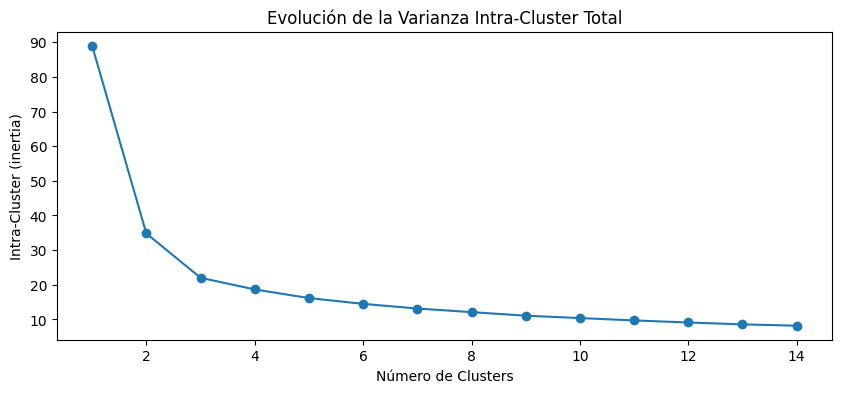

In [ ]:
# Elbow Method
# Rango de clusters a evaluar
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('kmeans', KMeans(
            n_clusters   = n_clusters,
            n_init       = 20,
            random_state = 100477706
        ))
    ])

    pipeline.fit(X)
    # Obtener la inercia del modelo KMeans
    inertia = pipeline.named_steps['kmeans'].inertia_
    inertias.append(inertia)

# Graficar la curva del método del codo
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la Varianza Intra-Cluster Total")
ax.set_xlabel('Número de Clusters')
ax.set_ylabel('Intra-Cluster (inertia)');

Como se puede observar en la gráfica, el punto en el cual se empieza a ralentizar el decrecimiento de la `.inertia_` es cuando el número de clusters es igual a 3. A partir de dicho punto, el decrecimiento es constante y ralentizado, lo cual indica que el punto de codo o punto óptimo es cuando `n_clusters` es igual a 3 (K=3).

####  **3.1.1.b. Método de la Silueta (Silhouette Method)**

---

A pesar de nosotros observar claramente cuál es el punto óptimo con el método del codo, podemos confirmar nuestra conclusión con el uso del método de la silueta. Este método se utiliza en muchas ocasiones cuando el método del codo no nos otorga un resultado claro del número óptimo de clusters.

Este método utiliza la distancia media intraclúster y la distancia media clúster más cercano para cada muestra, para que cuanto mayor sea el valor de la puntuación, mejor sea la estimación. Normalmente, las puntuaciones de silhoutte suben y luego bajan hasta alcanzar un número óptimo de clusters, por lo que observaremos que los valores se sitúan entre -1,0 y 1,0.

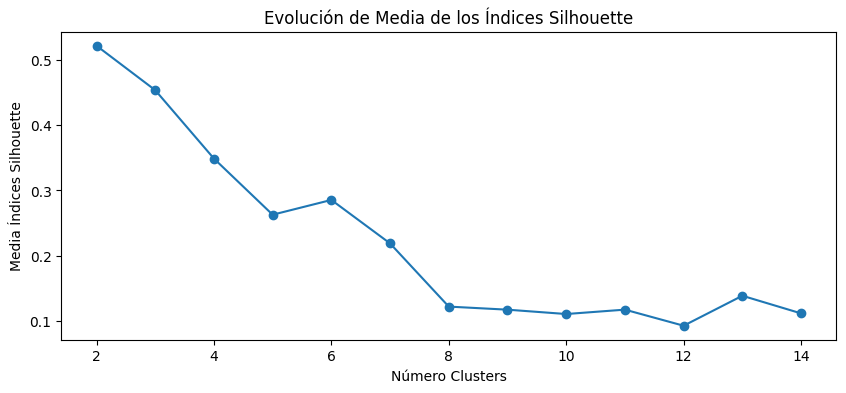

In [ ]:
# Silhouette Method
# Rango de clusters a evaluar
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('kmeans', KMeans(
            n_clusters   = n_clusters,
            n_init       = 20,
            random_state = 100477706
        ))
    ])

    # Obtener la inercia del modelo KMeans
    cluster_labels = pipeline.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

# Graficar la curva del método del codo
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de Media de los Índices Silhouette")
ax.set_xlabel('Número Clusters')
ax.set_ylabel('Media Índices Silhouette');

Como se puede observar el mejor número de clusters para este apartado es cuando K=2, ya que es el punto que tiene el valor más alto de la representación gráfica.

####  **3.1.1.c. Conclusión de la Modificación**

Después de realizar las pertinenetes verificaciones con el uso de las dos técnicas antes mencionadas podemos concluir que existe una leve diferencia entre ambos métodos, ya que los resultados son diferentes. Sin embargo, a modo de análisis podemos decir que con un número de 3 clusters, el resultado del método de la silueta es igual de bueno, aunque no es tan óptimo.

Si nosotros afirmamos eso, podemos lograr que ambos resultados se contrasten y por lo tanto eliminar la diferencia de resltados. Esto logra que podamos afirmar que con un número de 3 clusters se puede obtener el mejor resultado que es afirmado por ambos métodos.

### **3.1.2. Resultado Final del K-Means**

---

Una vez concluído el apartado anterior, entonces podemos aplicar el método K-Means teniendo en cuenta que utilizaremos 3 clusters como parámetro para su producción.

Para mostrar el cómo se han distribuido los datos según el número de clusters, utilizaremos dos plots, en los cuales podremos observar la distribución y la ubicación de los centroides en los grupos.

In [ ]:
# Pipeline: escalado + k-means con k=3
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('kmeans', KMeans(n_clusters=3, n_init=20, random_state=100477706))
])

# Entrenamiento del modelo
pipeline.fit(X)

# Predicción de etiquetas de cluster
y_predict = pipeline.predict(X)

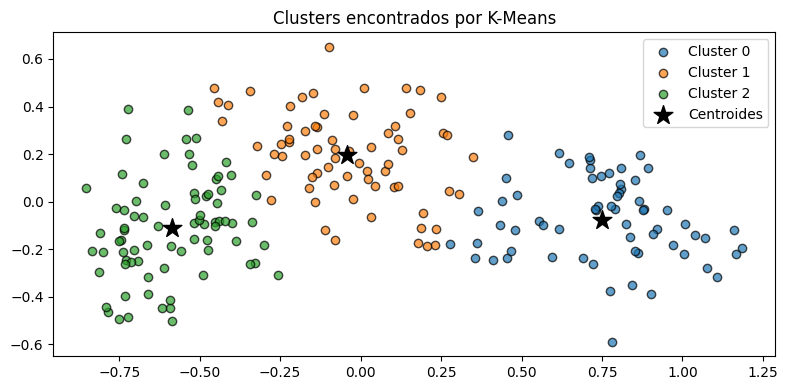

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducimos los datos escalados a 2D con PCA para visualización
X_scaled = pipeline.named_steps['scaler'].transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Obtenemos etiquetas y centroides
y_predict = pipeline.predict(X)
centroides = pipeline.named_steps['kmeans'].cluster_centers_
centroides_pca = pca.transform(centroides)  # Centroides en espacio PCA

# Gráfico
plt.figure(figsize=(8, 4))
for i in np.unique(y_predict):
    plt.scatter(
        X_pca[y_predict == i, 0],
        X_pca[y_predict == i, 1],
        label=f'Cluster {i}',
        edgecolor='black',
        alpha=0.7
    )

# Centroides
plt.scatter(
    centroides_pca[:, 0],
    centroides_pca[:, 1],
    c='black',
    s=200,
    marker='*',
    label='Centroides'
)

plt.title('Clusters encontrados por K-Means')
plt.legend()
plt.tight_layout()
plt.show()


Podemos ver también el número de aciertos y errores. Podemos verlo como una matriz de confusión. Aquí hay que tener cuidado que Kmeans asigna un cluster cuyo número puede ser distinto. Por lo tanto, cada fila tiene que tener un número alto (aciertos) y en las demás posiciones valores bajos (errores de clasificación)

In [ ]:
# Matriz de confusión: grupos originales vs clusters creados
pd.crosstab(y, y_predict, dropna=False, rownames=['grupo_real'], colnames=['cluster'])

cluster,0,1,2
grupo_real,,,
1,2,58,10
2,62,8,0
3,0,3,67


## **3.2. Cluster Jerárquico**

---